# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = prices[np.argmin(prices)]

# TODO: Maximum price of the data
maximum_price = prices[np.argmax(prices)]

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer:**

**RM:** Usually neighborhoods where properties are more expensive have larger houses. Since the number of rooms of a house is a good proxy to size, I would argue that a house located in a neighborhood where the average number of rooms is large, is more likely to be more expensive. Thus, _an increase in RM would lead to an increase in MEDV._

**LSTAT:** Usually people with lower incomes are not homeowners in neighborhoods where homes are more valuable. If the percentage of homeowners belonging to a lower economic status in a given neighborhood is large, it is more probable that a house in this neighborhood is cheaper. Thus, _an increase in LSTAT would lead to a decrease in MEDV._

**PTRATIO:** Usually, well off neighborhoods have a good educational offer for primary and secondary schools. This is represented in infrastructure, and also a good ratio of students to teachers, among other things. If there is a relatively large ratio of students to teachers in a given neighborhood, this means that there is probably a shortage of teachers and thus that this may not be a choice for families that value highly a good education for their children. Since demand for houses in such neighborhoods is diminished, _an increase in PTRATIO would lead to a decrease in MEDV._

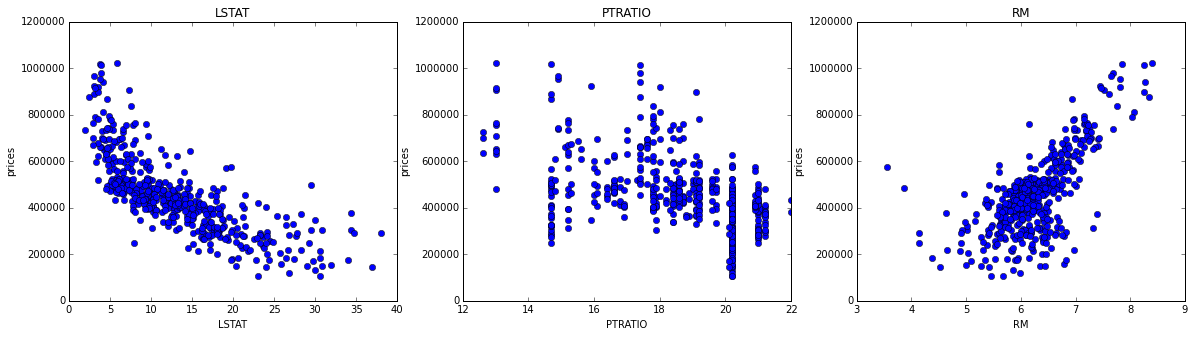

In [3]:
'''
Let's confirm these observations, as suggested on the first review:
'''
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i)
    plt.plot(data[col], prices, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [4]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**

This model has a coefficient of determination R<sup>2</sup> = 0.923. This value represents a high performance for this model, meaning that it successfully captures the variation of the target variable: 92.3% of the variance in the target value is predictable by this model. Observing the table of True Values and Predictions, none of the predicted values is exactly the true value; however, a plot of both series would be very similar in the sense that both would trace a very much alike path. 

:0: FutureWarning: IPython widgets are experimental and may change in the future.


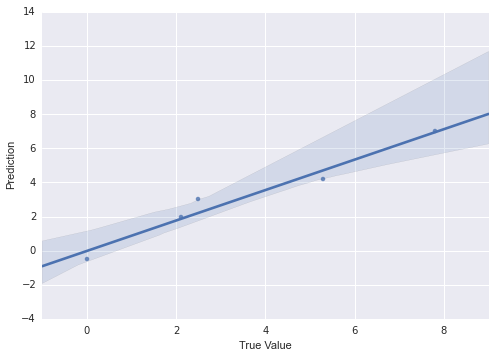

In [7]:
'''
Let's confirm again this relationship with a plot, as suggested on the first review:
'''
import seaborn as sns
sample_df = pd.DataFrame([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3]).reset_index()
sample_df.columns = ['True Value', 'Prediction']
sns.regplot('True Value', 'Prediction', sample_df)

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [8]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.20, random_state = 28)
# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

The testing subset is not used for training the learning algorithm, this approach will avoid testing the model on data that has already learned. Since we are looking to build a model that can predict a target value (Boston housing prices), holding out part of the data for testing allows us to assess how our model performs with unseen data, comparing the predicted values of our model with the actual values of the testing subset.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

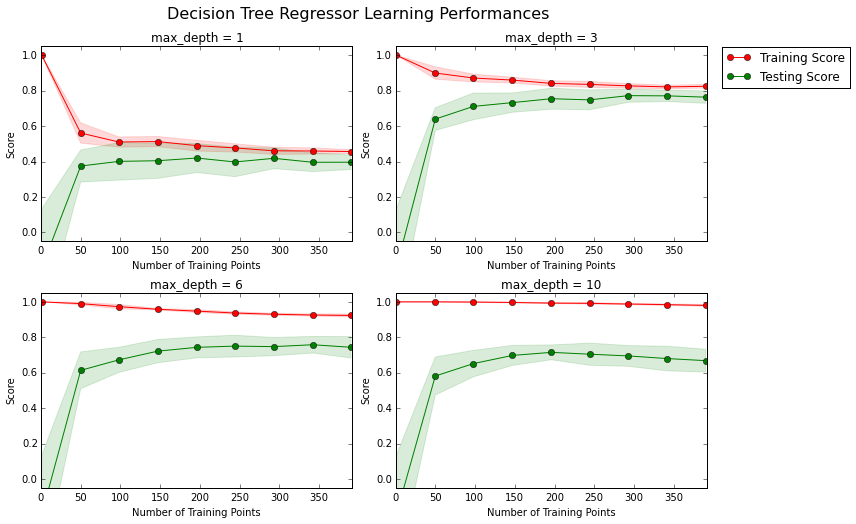

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** 

Training score tends to decrease as more training points are added, since it is easier for the learning algorithm (in this case a decision tree) to fit into a smaller dataset. Testing score tends to increase as more training points are added, since a larger training set implies a better generalization, which is what we are looking for when trying to use the model to predict the target variable on new data. 

In the graph for parameter maximum depth = 3, both the training and testing scores are converging to a R<sup>2</sup> of 0.8 as more training points are added. In this case it seems that an optimal trade off has been achieved compared to the other three cases, and adding more training points would not be justified since the marginal change on both training and testing scores is minimal. 

When maximum depth = 1, scores also converge but to a very low R<sup>2</sup> of around 0.42, so in this case there is underfitting. 

For maximum depths 6 and 10 the training score doesn't decreases as much when more training points are added, but the testing score seems to be restricted to lower values of performance regardless of training size, so overfitting starts to take place. The increasing gap between training score and testing score is evidence of increasing high variance.  

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

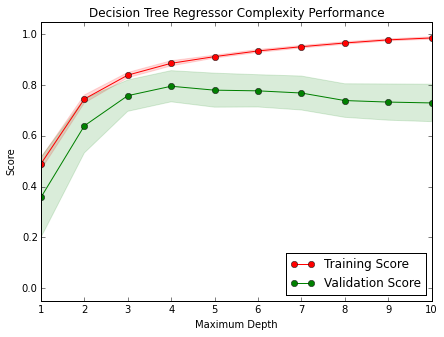

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

When the model is trained with maximum depth 1, both the training and validation scores have a very low performance; thus, the model is not able to represent the underlying complexity. In this case the cause of error is _bias_, or underfitting.

When the model is trained with maximum depth 10, the training score is almost perfect; i.e. the model has learned the training data to almost a perfect fit. However, the testing score is diverging from the training score after  around maximum depth 4, and at maximum depth 10 has the worst performance that the graph shows. In this case the model is losing its ability to generalize, and in this case tha cause of error is _variance_, or overfitting.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

The graph is very useful to realize that with maximum depth **4**, the model achieves the best trade-off because it has the best possible generalization (validation score) without compromising the complexity representation achieved by training (training score). 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

Some learning algorithm will be used to make the prediction we are looking for. This algorithm has a set of parameters that specify its approach to learning from the dataset, and ultimately generalizing to make predictions. Given a dataset, different combinations of parameters yield different performances. This is why it is good practice to explore automatically different sets of parameters to optimize the performance of the estimator. [Grid search](http://scikit-learn.org/0.17/modules/grid_search.html#grid-search) is a technique in which a _grid_ of different values of one or various parameters of the learning algorithm in question is tested. By choosing the best performing parameter values combination, the performance of the model is improved.  

In the case of an exhaustive search this method can become very computationally expensive when there are a large number of different hyperparameters. An alternative in this scenario is [Randomized search](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.RandomizedSearchCV.html) which samples values from a parameter space.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

As explained in the [scikit-learn documentation for Cross-validation ](http://scikit-learn.org/stable/modules/cross_validation.html), "When evaluating different settings (“hyperparameters”) for estimators... there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally". To solve this problem, the dataset can be splitted in three subsets; the training and testing subsets, plus a validation subset. The parameter optmization can be implemented on the validation subset, and the final model evaluation can be then safely done on the testing subset.

A drawback of splitting the initial dataset in three subsets is that all subsets are further reduced in number of samples. This increases the risk that the randomly chosen partitions don't reflect well the underlying model. In the k-fold cross-validation, instead of making use of a validation subset, the dataset is split into k sets, and iteratively k-1 sets are used for training and the remaining one is left for testing. This procedure ensures a training procedure that allows for parameter optimization without overfitting.

After training is performed using the k-fold approach, the last step is to compute the _average_ of the performance measure values obtained in the loop described before. This is the final value reported that yields the final error rate.  

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_iter'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [9]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

The optimal value for the parameter 'max_depth' of our decision tree learning algorithm is **4**. This is consistent to the observed value in question 6 of **4** in the complexity curve.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $316,718.18
Predicted selling price for Client 2's home: $231,730.43
Predicted selling price for Client 3's home: $913,500.00


**Answer: **

For Client 3, number of rooms is very high, and both neighborhood poverty level as student-teacher ratio are very low, yielding a very high predicted price (close to the maximum price of our dataset). This is expected since all three conditions for high price are met. 

Client 1 wants to sell a house, compared to Client 3, with less rooms, and higher values for neighborhood poverty level and student-teacher ratio; therefore, all three features contribute to the predicted price to be significantly lower than that of Client 3. A value below than the mean or median values for our dataset. 

Client 2 again has all three features contributing to lower even further the predicted price; namely, fewer rooms, and higher neighborhood poverty level and student-teacher ratio.

Although the differences in the feature values for Client 3 vs. Client 2 compared to the differences of Client 2 vs. Client 1 are not particularly contrasting, the difference between the predicted selling price for Client 3 and Client 1 is significantly higher (3.6 standard deviations of our dataset) than the difference between Client 1 and Client 2 (0.5 standard deviations of our dataset). This is also consistent with the hint of a positively skewed distribution when we explored descriptive statistics for prices earlier on. 

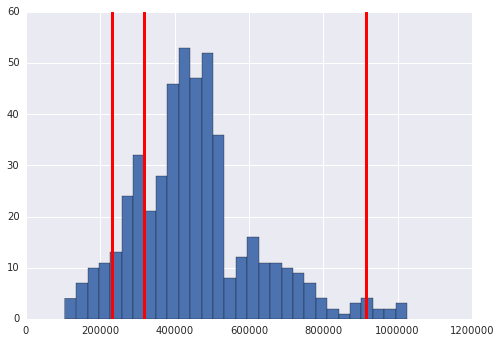

In [12]:
'''
Histogram to support previous observations, as suggested on the first review:
'''
plt.hist(prices, bins = 30)
for price in reg.predict(client_data):
    plt.axvline(price, c = 'r', lw = 3)

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $428,316.00
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $37,132.67


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

Although prices have been scaled to account for inflation, this dataset is too old to be used in a real-world setting. Inflation is only one of several factors affecting the real estate market of a city like Boston. Also, the fact that many variables have been excluded for the specific purpose of this project to focus on model evaluation and validation makes the dataset poor in features. There is also the possibility that features important to predict selling prices today, in Boston, were not included in the initial dataset. 

Aditionally, it can be argued that the model doesn't seem robust enough to make consistent predictions. This can be documented by the fact that the range in prices in the Sensitivity section above is 0.22 standard deviations of our initial dataset for 10 trials. Setting an initial selling price of \$391,183.33 may be very different than setting it at \$428,316.00. Although this is subjective I would prefer a Sensitivity range of prices no larger than 0.1 (\$16,500) standard deviations of our initial dataset.

Also, a dataset collected in Boston could not possibly be used for a rural city. It is not even applicable for similar size cities around the world. Every city has its own dynamics and characteristics when it comes to real estate, and even though north-american large cities have somethings in common, I wouldn´t recomend using a model based on Boston real estate data to predict home selling prices in Washington D.C.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.